In [157]:
# Разведовательный анализ данных (eda)
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/titanic.csv"

In [158]:
import pandas as pd
import numpy as np

In [159]:
df = pd.read_csv(url)
# df.head()

In [160]:
df.iloc[:, :3]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3
...,...,...,...
886,887,0,2
887,888,1,1
888,889,0,3
889,890,1,1


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [162]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [164]:
df = df.drop(['PassengerId','Ticket', 'Name', 'Male'],axis=1)

KeyError: "['Male'] not found in axis"

In [ ]:
df.shape

(891, 9)

In [ ]:
df.size

8019

In [ ]:
df['Fare']  = round(df['Fare'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.0,NaN,S
1,1,1,female,38.0,1,0,71.0,C85,C
2,1,3,female,26.0,0,0,8.0,NaN,S
3,1,1,female,35.0,1,0,53.0,C123,S
4,0,3,male,35.0,0,0,8.0,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,NaN,S
887,1,1,female,19.0,0,0,30.0,B42,S
888,0,3,female,NaN,1,2,23.0,NaN,S
889,1,1,male,26.0,0,0,30.0,C148,C


In [ ]:
# Подсчет пропусков 
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# df['Age'].fillna(25)
mean_age = df['Age'].mean()

<Axes: >

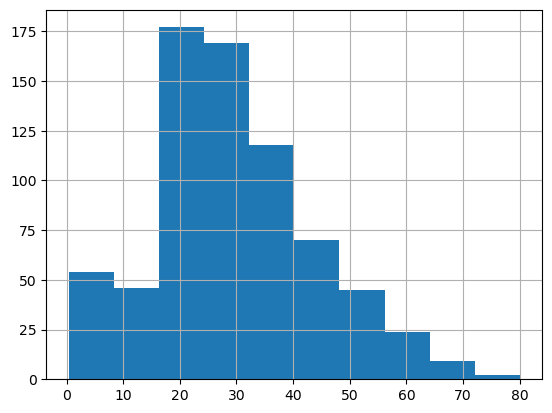

In [ ]:
df['Age'].hist()

In [ ]:
df['Age'].fillna(mean_age)


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
df.query('Pclass == 1').Age.mean()

38.233440860215055

In [ ]:
df.sample(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
400,1,3,male,39.0,0,0,8.0,NaN,S
298,1,1,male,NaN,0,0,30.0,C106,S
31,1,1,female,NaN,1,0,147.0,B78,C
167,0,3,female,45.0,1,4,28.0,NaN,S
508,0,3,male,28.0,0,0,23.0,NaN,S
511,0,3,male,NaN,0,0,8.0,NaN,S
743,0,3,male,24.0,1,0,16.0,NaN,S
886,0,2,male,27.0,0,0,13.0,NaN,S
337,1,1,female,41.0,0,0,134.0,E40,C
128,1,3,female,NaN,1,1,22.0,F E69,C


In [ ]:
def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return df.query('Pclass == 1').Age.mean()
        elif row['Pclass'] == 2:
            return df.query('Pclass == 2').Age.mean()
        elif row['Pclass'] == 3:
            return df.query('Pclass == 3').Age.mean()
    return row['Age']     

In [ ]:
df.apply(fill_age, axis='columns')

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Length: 891, dtype: float64

In [ ]:
# Группировка по Pclass, разбивает на группы по значениям Pclass, из каждой группы выбираем Age, заполняем пропуски ср.зн, через аноноим.ф. 
# group_keys=True Возвращает объект GroupedDataFrame, где индекс содержит столбец Pclass(будут ли ключи гркппировки включены в инд результ объекта)
df.groupby('Pclass', group_keys=True)['Age'].apply(lambda x: x.fillna(x.mean()))

Pclass     
1       1      38.00000
        3      35.00000
        6      54.00000
        11     58.00000
        23     28.00000
                 ...   
3       882    22.00000
        884    25.00000
        885    39.00000
        888    25.14062
        890    32.00000
Name: Age, Length: 891, dtype: float64

In [ ]:
# Проверяет эквавалентонсть способов 
df.apply(fill_age, axis=1).equals(df.groupby('Pclass', group_keys=True)['Age'].apply(lambda x: x.fillna(x.mean())))

False

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.0,NaN,S
1,1,1,female,38.0,1,0,71.0,C85,C
2,1,3,female,26.0,0,0,8.0,NaN,S
3,1,1,female,35.0,1,0,53.0,C123,S
4,0,3,male,35.0,0,0,8.0,NaN,S


In [ ]:
# SibSp - Количество братьев и сестер / супругов на борту
# Parch - число родителей / детей на борту

def alone_check(row):
    if row['SibSp'] > 0 or row['Parch'] > 0:
        return 'not alone'
    return 'alone'

In [ ]:
df['Alone'] = df.apply(alone_check, axis=1)
df



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone
0,0,3,male,22.0,1,0,7.0,NaN,S,not alone
1,1,1,female,38.0,1,0,71.0,C85,C,not alone
2,1,3,female,26.0,0,0,8.0,NaN,S,alone
3,1,1,female,35.0,1,0,53.0,C123,S,not alone
4,0,3,male,35.0,0,0,8.0,NaN,S,alone
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,NaN,S,alone
887,1,1,female,19.0,0,0,30.0,B42,S,alone
888,0,3,female,NaN,1,2,23.0,NaN,S,not alone
889,1,1,male,26.0,0,0,30.0,C148,C,alone


In [ ]:
df['Alone'] = df.apply(lambda x: 'not alone' if x['SibSp'] > 0 or x['Parch'] > 0 else 'alone', axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone
0,0,3,male,22.0,1,0,7.0,NaN,S,not alone
1,1,1,female,38.0,1,0,71.0,C85,C,not alone
2,1,3,female,26.0,0,0,8.0,NaN,S,alone
3,1,1,female,35.0,1,0,53.0,C123,S,not alone
4,0,3,male,35.0,0,0,8.0,NaN,S,alone
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,NaN,S,alone
887,1,1,female,19.0,0,0,30.0,B42,S,alone
888,0,3,female,NaN,1,2,23.0,NaN,S,not alone
889,1,1,male,26.0,0,0,30.0,C148,C,alone


In [ ]:
import seaborn as sns

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


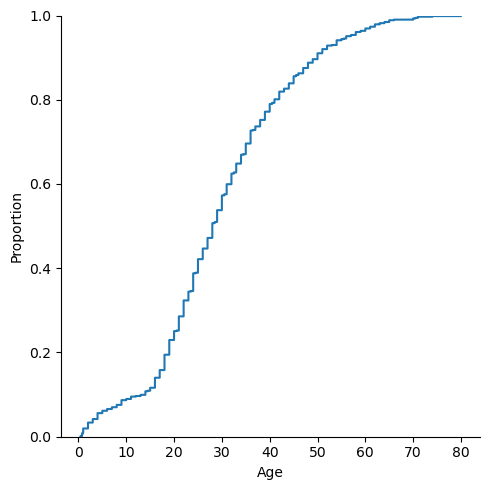

In [ ]:
sns.displot(df['Age'], kind='ecdf')

In [165]:
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'